In [1]:
# Initialize Notebook
from IPython.core.display import HTML,Image
#%run ../library/v1.0.5/init.ipy
HTML('''<script> code_show=true;  function code_toggle() {  if (code_show){  $('div.input').hide();  } else {  $('div.input').show();  }  code_show = !code_show }  $( document ).ready(code_toggle); </script> <form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

# Assignment 4
**Chen Xupeng**

## Ex 1. 
(10 pt) Use the Strong Duality Theorem to show that

$$
\begin{array} { c } { \min _ { \beta _ { 0 } , \beta } \sum _ { i = 1 } ^ { n } \left( y - \beta _ { 0 } - x ^ { T } \beta \right) ^ { 2 } } \\ { \text { s.t. } \sum _ { j = 1 } ^ { p } \left| \beta _ { j } \right| \leq s } \end{array}
$$

where s > 0, is equivalent to the unconstrained problem

$$
\begin{array} { c } { \min _ { \beta _ { 0 } , \beta } \sum _ { i = 1 } ^ { n } \left( y - \beta _ { 0 } - x ^ { T } \beta \right) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { p } \left| \beta _ { j } \right| } \\ { \text { for some } \lambda > 0 . } \end{array}
$$

## Ex 2.
1. (10 pt) Simulate training and test data as described in Section 12.3.4 of “Elements of Statistical Learning” (2nd Edition), for both the version with and the version without the 6 noise dimensions. For each version, train a SVM classiﬁer using the RBF kernel (you can use the ’kernlab’ package in R) and tune the $C$ and the $\sigma^2$ parameters by cross-validation.

In [2]:
import numpy as np
from sklearn.svm import SVC
#import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import roc_curve,roc_auc_score,auc,precision_recall_curve,average_precision_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.neighbors import NearestNeighbors
#from ipywidgets import interact,interactive, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

Populating the interactive namespace from numpy and matplotlib


In [3]:
orange4_train = pd.read_table('orange4.train',sep=',',header=None).astype('float')
orange4_train.columns = np.concatenate((np.array(['class']),np.array(['feature'+str(i) for i in range(1,orange4_train.shape[1])] ) ))
orange4_test = pd.read_table('orange4.test',sep=',',header=None).astype('float')
orange4_test.columns = np.concatenate((np.array(['class']),np.array(['feature'+str(i) for i in range(1,orange4_test.shape[1])] ) ))
orange10_train = pd.read_table('orange10.train',sep=',',header=None).astype('float')
orange10_train.columns = np.concatenate((np.array(['class']),np.array(['feature'+str(i) for i in range(1,orange10_train.shape[1])] ) ))
orange10_test = pd.read_table('orange10.test',sep=',',header=None).astype('float')
orange10_test.columns = np.concatenate((np.array(['class']),np.array(['feature'+str(i) for i in range(1,orange10_test.shape[1])] ) ))


In [4]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
from bokeh.palettes import Category20c
def legendhandle(lists,porm=True,order=0):
    tableau10m = np.array([(114,158,206),(255,158,74),(103,191,92),(237,102,93),(173,139,201),
                       (168,120,110),(237,151,202),(162,162,162),(205,204,93),(109,204,218)])/255
    if porm == True:
        if order == 0:
            palette = np.array(Category20c[20]).reshape(4,-1).T.ravel() #
        if order == 1:
            palette = Pastel2[8]
        lists.sort()
        dic={}
        for i in range(len(lists)):
            dic[lists[i]]=palette[i]
        return dic
    else:
        markerlist1 = ['v','^','<','>'] #triangle_down triangle_up triangle_left triangle_left
        markerlist2 = ['P','o','X','s'] #plus (filled) circle x (filled) square
        markerlist3 = ['$f$','$g$','$h$','$l$']
        markerlist3.sort()
        if order == 0:
            markers = markerlist2
        if order == 1:
            markers = markerlist1
        if order == 2:
            markers = markerlist3
            
        lists.sort()
        dic={}
        for i in range(len(lists)):
            dic[lists[i]]=markers[i]
        return dic       

def PCA_plot_sns(ax,data,sampleclass,method = 'Origin'):
    #X = log_transfrom(data).T
    X = StandardScaler().fit_transform(data.T)
    if method=='Origin':
        X_pca=X
    if method == 'PCA':
        transform = PCA()
        X_pca = transform.fit_transform(X)
    elif method == 'tSNE':
        transform = TSNE()
        X_pca = transform.fit_transform(X)
   
    plot_table = pd.DataFrame(X_pca[:,:2])
    plot_table.index = data.columns
    #display(plot_table)
    plot_table = pd.concat((plot_table,sampleclass.loc[plot_table.index]),axis=1)
    plot_table.columns = ['dimension_1','dimension_2','class']
    classnum = np.unique(plot_table.iloc[:,2]).shape[0]
    
    #plot_table=plot_table.astype('float')
    #plot_table.iloc[:,2]  = plot_table.iloc[:,2].astype('str')
    #plot_table.iloc[:,0] = pd.to_numeric(plot_table.iloc[:,0])
    #plot_table.iloc[:,1] = pd.to_numeric(plot_table.iloc[:,1])

    sns.scatterplot(ax=ax,data=plot_table,x="dimension_1", y="dimension_2",markers=filled_markers,
                    palette=legendhandle(np.unique(plot_table['class'])), hue="class",style="class",s=30,linewidth=0.01)
    
    #std_plot(ax,'Dimension 1','Dimension 2',None,
    #         title=method, legendtitle='class',legendsort=False
    #         ,xbins=6,ybins=6
    #        )
    #legend = ax.legend(prop=fontlegend,bbox_to_anchor=(1.2,0.9),framealpha=0,labelspacing=0.24)
    ax.legend_.get_frame()._linewidth=0
    fig.tight_layout()
    fig.savefig(method+'_plot.eps')

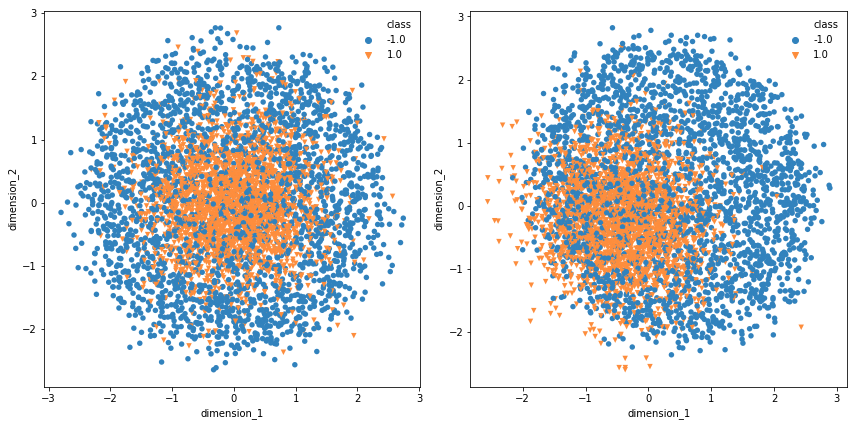

In [5]:
input_table = orange4_train
classes = input_table.index
fig, ax = plt.subplots(1,2,figsize=(12,6))
PCA_plot_sns(ax[0],input_table.iloc[:,1:].T.iloc[np.array([0,1])],input_table['class'],'Origin')
PCA_plot_sns(ax[1],input_table.T,input_table['class'],'PCA')
#embed_pdf_figure()

In [ ]:
input_table = orange4_train
classes = input_table.index
fig, ax = plt.subplots(4,4,figsize=(16,16))
for i in range(4):
    for j in range(4):
        if i!=j:
            PCA_plot_sns(ax[i,j],input_table.iloc[:,1:].T.iloc[np.array([i,j])],input_table['class'],'Origin')
            ax[i,j].set_title('feature '+str(i+1)+' feature '+str(j+1))
#PCA_plot_sns(ax[1],input_table.T,input_table['class'],'PCA')
#embed_pdf_figure()
fig.savefig('separation_visualization_plot.eps')

`SVC(C=1.0, kernel='rbf', gamma='auto_deprecated')`<br>
default gamma ('auto_deprecated') = 1/feature_num

In [ ]:
svc_model = SVC(C=1.0, kernel='rbf', gamma='auto')
svc_model.fit(np.array(orange4_train.iloc[:,1:]),np.array(orange4_train.iloc[:,0]))

In [60]:
sum_df = pd.DataFrame(columns=['kernel','C','gamma','grid_mean','grid_std','optimized_score'],
             index = np.arange(0,gamma_list.shape[0]*C_list.shape[0]))

We use grid search to find the best hyperparameters.
The two metrics are precision and recall, using either of these metrics, we can have a grid score to test the hyperparameters. The higher grid search scores mean better performance. By doing cross validation we can find the best hyperparameters

In [ ]:
# Split the dataset in two equal parts
X,y = np.array(orange4_train.iloc[:,1:]),np.array(orange4_train.iloc[:,0])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Set the parameters by cross-validation

kernel_list = ['rbf']
gamma_list = np.array([10**(i) for i in range(-5,0)])
C_list = np.array([10**(i) for i in range(0,4)])
scores = ['precision', 'recall']

tuned_parameters = [{'kernel':kernel_list , 'gamma': gamma_list,
                     'C': C_list}]


count = 0 
for score in scores:
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print(sklearn.metrics.accuracy_score(y_true,y_pred))
    #sum_df.iloc[count] = np.array([score])
    count+=1

'C' = 100 and 'gamma' = 0.1 has best result for precision as metric
'C' = 100 and 'gamma' = 0.1 has best result for recall as metric

for orange_10 with 10 features:

In [ ]:
# Split the dataset in two equal parts
X,y = np.array(orange10_train.iloc[:,1:]),np.array(orange10_train.iloc[:,0])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Set the parameters by cross-validation

kernel_list = ['rbf']
gamma_list = np.array([10**(i) for i in range(-5,0)])
C_list = np.array([10**(i) for i in range(0,4)])
scores = ['precision', 'recall']

tuned_parameters = [{'kernel':kernel_list , 'gamma': gamma_list,
                     'C': C_list}]


count = 0 
for score in scores:
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print(sklearn.metrics.accuracy_score(y_true,y_pred))
    #sum_df.iloc[count] = np.array([score])
    count+=1

'C' = 100 and 'gamma' = 0.1 has best result for precision as metric
'C' = 100 and 'gamma' = 0.1 has best result for recall as metric

2. (10 pt) How does the RBF kernel perform compared to the polynomial kernels? How do you explain this performance with regard to the number of features and overﬁtting? (Recall that the RBF kernel is the inner product of an inﬁnite number of features.)

The polynomial and RBF kernel are different in case of making the hyperplane decision boundary between the classes.
The kernel functions are used to map the original dataset (linear/nonlinear ) into a higher dimensional space with view to making it linear dataset. Polynomial kernels are less time consuming and has less ability to represent complex dataset. <br>
The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of these. In the context of regression analysis, such combinations are known as interaction features. The (implicit) feature space of a polynomial kernel is equivalent to that of polynomial regression, but without the combinatorial blowup in the number of parameters to be learned.
<br>
RBF has better feature representation ability and it can also balance the bias, variance trade off. However polynomial kernel doesn't have such ability to control overfitting.
<br>
The RBF kernel is more popular in SVM classification than the polynomial kernel. The most common degree is d=2.
<br>
We should try simplest one first and then swith to more complex ones to avoid overfitting